In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Student_Performance.csv')

In [6]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [16]:
df["Extracurricular Activities"]=le.fit_transform(df["Extracurricular Activities"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [21]:
X=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [26]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [27]:
y_pred

array([54.73187888, 22.61211054, 47.90838844, ..., 68.07396952,
       53.68636805, 54.85816372])

In [30]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [31]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [32]:
print('mse\n',mse) #accuracy
print('mae\n',mae)
print("r2\n",r2)

mse
 4.0325442154191125
mae
 1.5975792091646102
r2
 0.9890550757439104


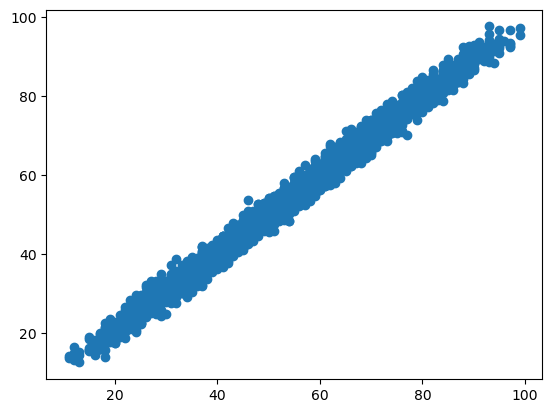

In [33]:
plt.scatter(y_test,y_pred)
plt.show()

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [38]:
pipe = Pipeline([
    ('scaler', StandardScaler()),      
    ('model', SVR())  
])


In [46]:
param_grid=[
   {
     'model':[SVR()],
     'model__C':[1,10],
     'model__gamma': ['scale', 0.1]
   },
    {
    'model': [RandomForestRegressor()],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5]
} ,
    {
        'model':[DecisionTreeRegressor(random_state=42)],
        'model__max_depth':[None,5,10],
        'model__min_samples_split': [2, 5, 10]
    }
]

In [47]:
grid=GridSearchCV(pipe,param_grid,cv=5,scoring='r2',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid=[{'model': [SVR()], 'model__C': [1, 10],
                          'model__gamma': ['scale', 0.1]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [None, 5],
                          'model__n_estimators': [100, 200]},
                         {'model': [DecisionTreeRegressor(random_state=42)],
                          'model__max_depth': [None, 5, 10],
                          'model__min_samples_split': [2, 5, 10]}],
             scoring='r2')

In [48]:
grid.best_params_

{'model': SVR(), 'model__C': 10, 'model__gamma': 0.1}

In [49]:
svr=SVR()
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mse\n',mse) #accuracy
print('mae\n',mae)
print("r2\n",r2)

mse
 5.417708520367254
mae
 1.8306799936347233
r2
 0.9852955339782112


In [53]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
y_pred=tree_reg.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mse\n',mse) #accuracy
print('mae\n',mae)
print("r2\n",r2)

mse
 8.806777777777778
mae
 2.3446666666666665
r2
 0.9760970963816269


[Text(0.5, 0.9, 'Previous Scores <= 69.5\nsquared_error = 369.151\nsamples = 7500\nvalue = 55.418'),
 Text(0.25, 0.7, 'Previous Scores <= 55.5\nsquared_error = 133.408\nsamples = 3735\nvalue = 40.027'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Hours Studied <= 4.5\nsquared_error = 82.379\nsamples = 1967\nvalue = 32.929'),
 Text(0.0625, 0.3, 'Previous Scores <= 46.5\nsquared_error = 37.67\nsamples = 887\nvalue = 25.805'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Previous Scores <= 47.5\nsquared_error = 43.175\nsamples = 1080\nvalue = 38.781'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Hours Studied <= 4.5\nsquared_error = 71.778\nsamples = 1768\nvalue = 47.924'),
 Text(0.3125, 0.3, 'Previous Scores <= 62.5\nsquared_error = 31.399\nsamples = 793\nvalue = 41.091'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Previous Scores 

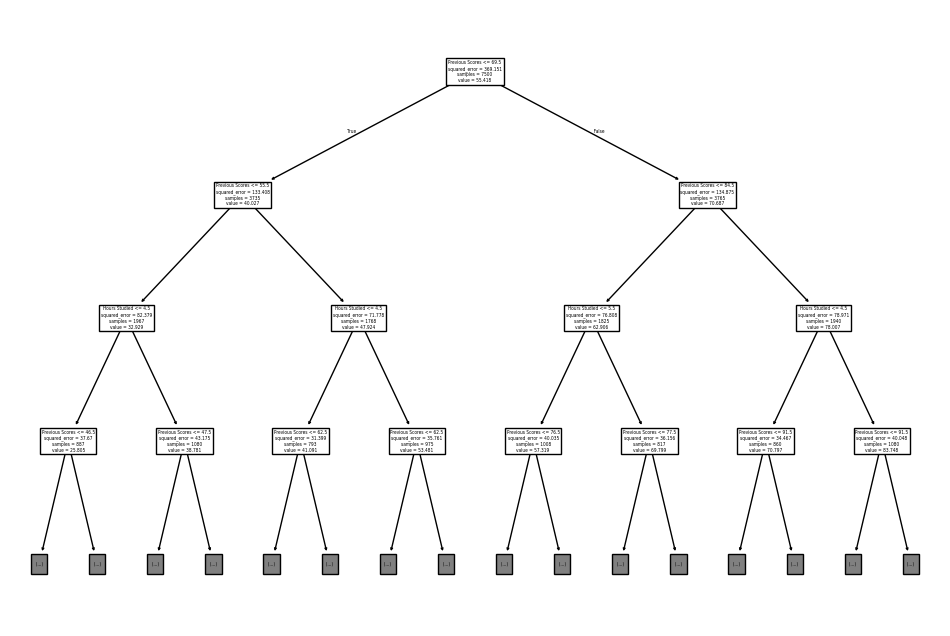

In [59]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(tree_reg.fit(X_train,y_train),feature_names=df.columns,max_depth=3)